In [164]:
import nltk
import pke
from spacy.lang.ja import stop_words
 
# ファイルパス
file_path = "jpn_sample.txt"
 
# 日本語のストップワードを設定
pke.base.lang_stopwords['ja_ginza'] = 'japanese'
 
# テキストの読み込み
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()
 
    # NLTKの処理
    stopwords = list(stop_words.STOP_WORDS)
    nltk.corpus.stopwords.words_org = nltk.corpus.stopwords.words
    nltk.corpus.stopwords.words = lambda lang: stopwords if lang == 'japanese' else nltk.corpus.stopwords.words_org(lang)
 
    # pkeの処理
    extractor = pke.unsupervised.MultipartiteRank()
    extractor.load_document(input=text, language='ja_ginza', normalization=None)
    extractor.candidate_selection(pos={'NOUN', 'PROPN', 'ADJ', 'NUM'})
    extractor.candidate_weighting(threshold=0.74, method='average', alpha=1.1)
 
    # 結果表示（上位10）
    result = extractor.get_n_best(n=10)
    for value in result:
        print(value)
    print(extractor)

In [166]:
import MeCab
import ipadic

tagger = MeCab.Tagger("mecab -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
print(tagger.parse("今日はいい天気です"))
#=> 
# 今日	名詞,副詞可能,*,*,*,*,今日,キョウ,キョー
# は	助詞,係助詞,*,*,*,*,は,ハ,ワ
# いい	形容詞,自立,*,*,形容詞・イイ,基本形,いい,イイ,イイ
# 天気	名詞,一般,*,*,*,*,天気,テンキ,テンキ
# です	助動詞,*,*,*,特殊・デス,基本形,です,デス,デス
# EOS

今日	名詞,副詞可能,*,*,*,*,今日,キョウ,キョー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
いい	形容詞,自立,*,*,形容詞・イイ,基本形,いい,イイ,イイ
天気	名詞,一般,*,*,*,*,天気,テンキ,テンキ
です	助動詞,*,*,*,特殊・デス,基本形,です,デス,デス
EOS



In [8]:
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.


In [9]:
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/local/lib/mecab/dic/mecab-ipadic-neologd


# 企業抽出

In [1]:
MClist = ['985033106', '066058233', '430105873', '985731100', '580004559', '400087148', '985612708', '985712409', '985757509', '600002843', '985794057', '986328831', '430113534', '271317028', '987209156']

In [2]:
def file_generator(file):
    with open(file) as f:
        for line in f:
            yield line

In [3]:
file_path = '/Users/taikitanaka/vsc/MFM/202201'
gen = file_generator(file_path)
header = next(gen).split(',')
print(header)

['発注社企業CD', '発注社漢字商号', '発注社売上高', '発注社資本金', '発注社従業員数', '発注社評点', '発注社住所CD', '発注社都道府県', '発注社市区郡', '発注社丁目名', '発注社所在地', '発注社大分類', '発注社中分類', '発注社小分類', '発注社主業', '発注社従業', '発注社売上高分類', '発注社自己資本比率分類', '発注社資本金分類', '発注社従業員数分類', '発注社評点分類', '発注社系列', '発注社親企業CD', '発注社親企業名', '発注社持株数比率', '発注社事業内容', '発注社市場名', '発注社証券CD', '発注社輸入直貿', '発注社輸入間接', '発注社輸出直貿', '発注社輸出間接', '発注社HPアドレスURL', '発注社営業所数', '発注社工場数', '発注社店舗数', '発注社その他事業所数', '発注社仕入先概数', '発注社仕入先把握数', '発注社販売先概数', '発注社販売先把握数', '受注社企業CD', '受注社漢字商号', '受注社売上高', '受注社資本金', '受注社従業員数', '受注社評点', '受注社住所CD', '受注社都道府県', '受注社市区郡', '受注社丁目名', '受注社所在地', '受注社大分類', '受注社中分類', '受注社小分類', '受注社主業', '受注社従業', '受注社売上高分類', '受注社自己資本比率分類', '受注社資本金分類', '受注社従業員数分類', '受注社評点分類', '受注社系列', '受注社親企業CD', '受注社親企業名', '受注社持株数比率', '受注社事業内容', '受注社市場名', '受注社証券CD', '受注社輸入直貿', '受注社輸入間接', '受注社輸出直貿', '受注社輸出間接', '受注社HPアドレスURL', '受注社営業所数', '受注社工場数', '受注社店舗数', '受注社その他事業所数', '受注社仕入先概数', '受注社仕入先把握数', '受注社販売先概数', '受注社販売先把握数', '品目名', '品目名検索用', 'データ元', '主力取引', 'エンドユーザーFLG', '年間取引高', '取引額確認年月', '取引確認年月', '新_直近取引継続年

In [4]:
file_path = '/Users/taikitanaka/vsc/MFM/202201'

CDlist = []
CDdic = {}
gen = file_generator(file_path)
for line in gen:
    tmp = line.split(',')
    if tmp[header.index('発注社企業CD')] in MClist:
        CDlist.append(tmp[header.index('受注社企業CD')])
        CDdic[tmp[header.index('受注社企業CD')]] = tmp[header.index('受注社漢字商号')]

CDlist = list(set(CDlist))
print(len(CDlist), len(CDdic))

10374 10374


In [5]:
def has_duplicates(seq):
    return len(seq) != len(set(seq))

print(has_duplicates(CDlist))

False


In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import MeCab
import ipadic
def tokenize(text):
  tagger = MeCab.Tagger("mecab -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
  lines = tagger.parse(' '.join(text.split())).splitlines()
  words = []
  for line in lines:
    chunks = line.split('\t')
    # print(chunks[0])
    if chunks[0] != 'EOS':
      words.append(chunks[0])
  return words

In [7]:
file_path = '/Users/taikitanaka/vsc/S0901/202101'
gen = file_generator(file_path)
header = next(gen)
print(header)

企業CD,己調識別CD,己調_文章_行長,己調_文章_行数,制御_情報,現況と見通し



## 己調識別CD
- 30 事業内容
- 40 会社の特色
- 50 最新期の業績
- 60 資金現況と調達力
- 70 最近の動向と見通し

In [8]:
file_path = '/Users/taikitanaka/vsc/S0901/202101'
docdic = {}
trainings = []
gen = file_generator(file_path)
for line in gen:
    tmp = line.split(',')
    if tmp[0] in CDlist and tmp[1] == '30':
        docdic[tmp[0]] = tmp[5]
        trainings.append(TaggedDocument(tokenize(tmp[5]), [tmp[0]]))

print(len(docdic), len(trainings))

10185 10185


# Doc2vecモデル作成・デンドログラムプロット

In [9]:
model = Doc2Vec(trainings, epochs=30, min_alpha=1e-4, sample=1e-3, min_count=5, window=15, vector_size=100)

In [15]:
model.save('CCR202101.model')

In [16]:
plot_list = []
name  = []
for train in trainings:
    plot_list.append(model.dv[train.tags[0]])
    name.append(CDdic[train.tags[0]])

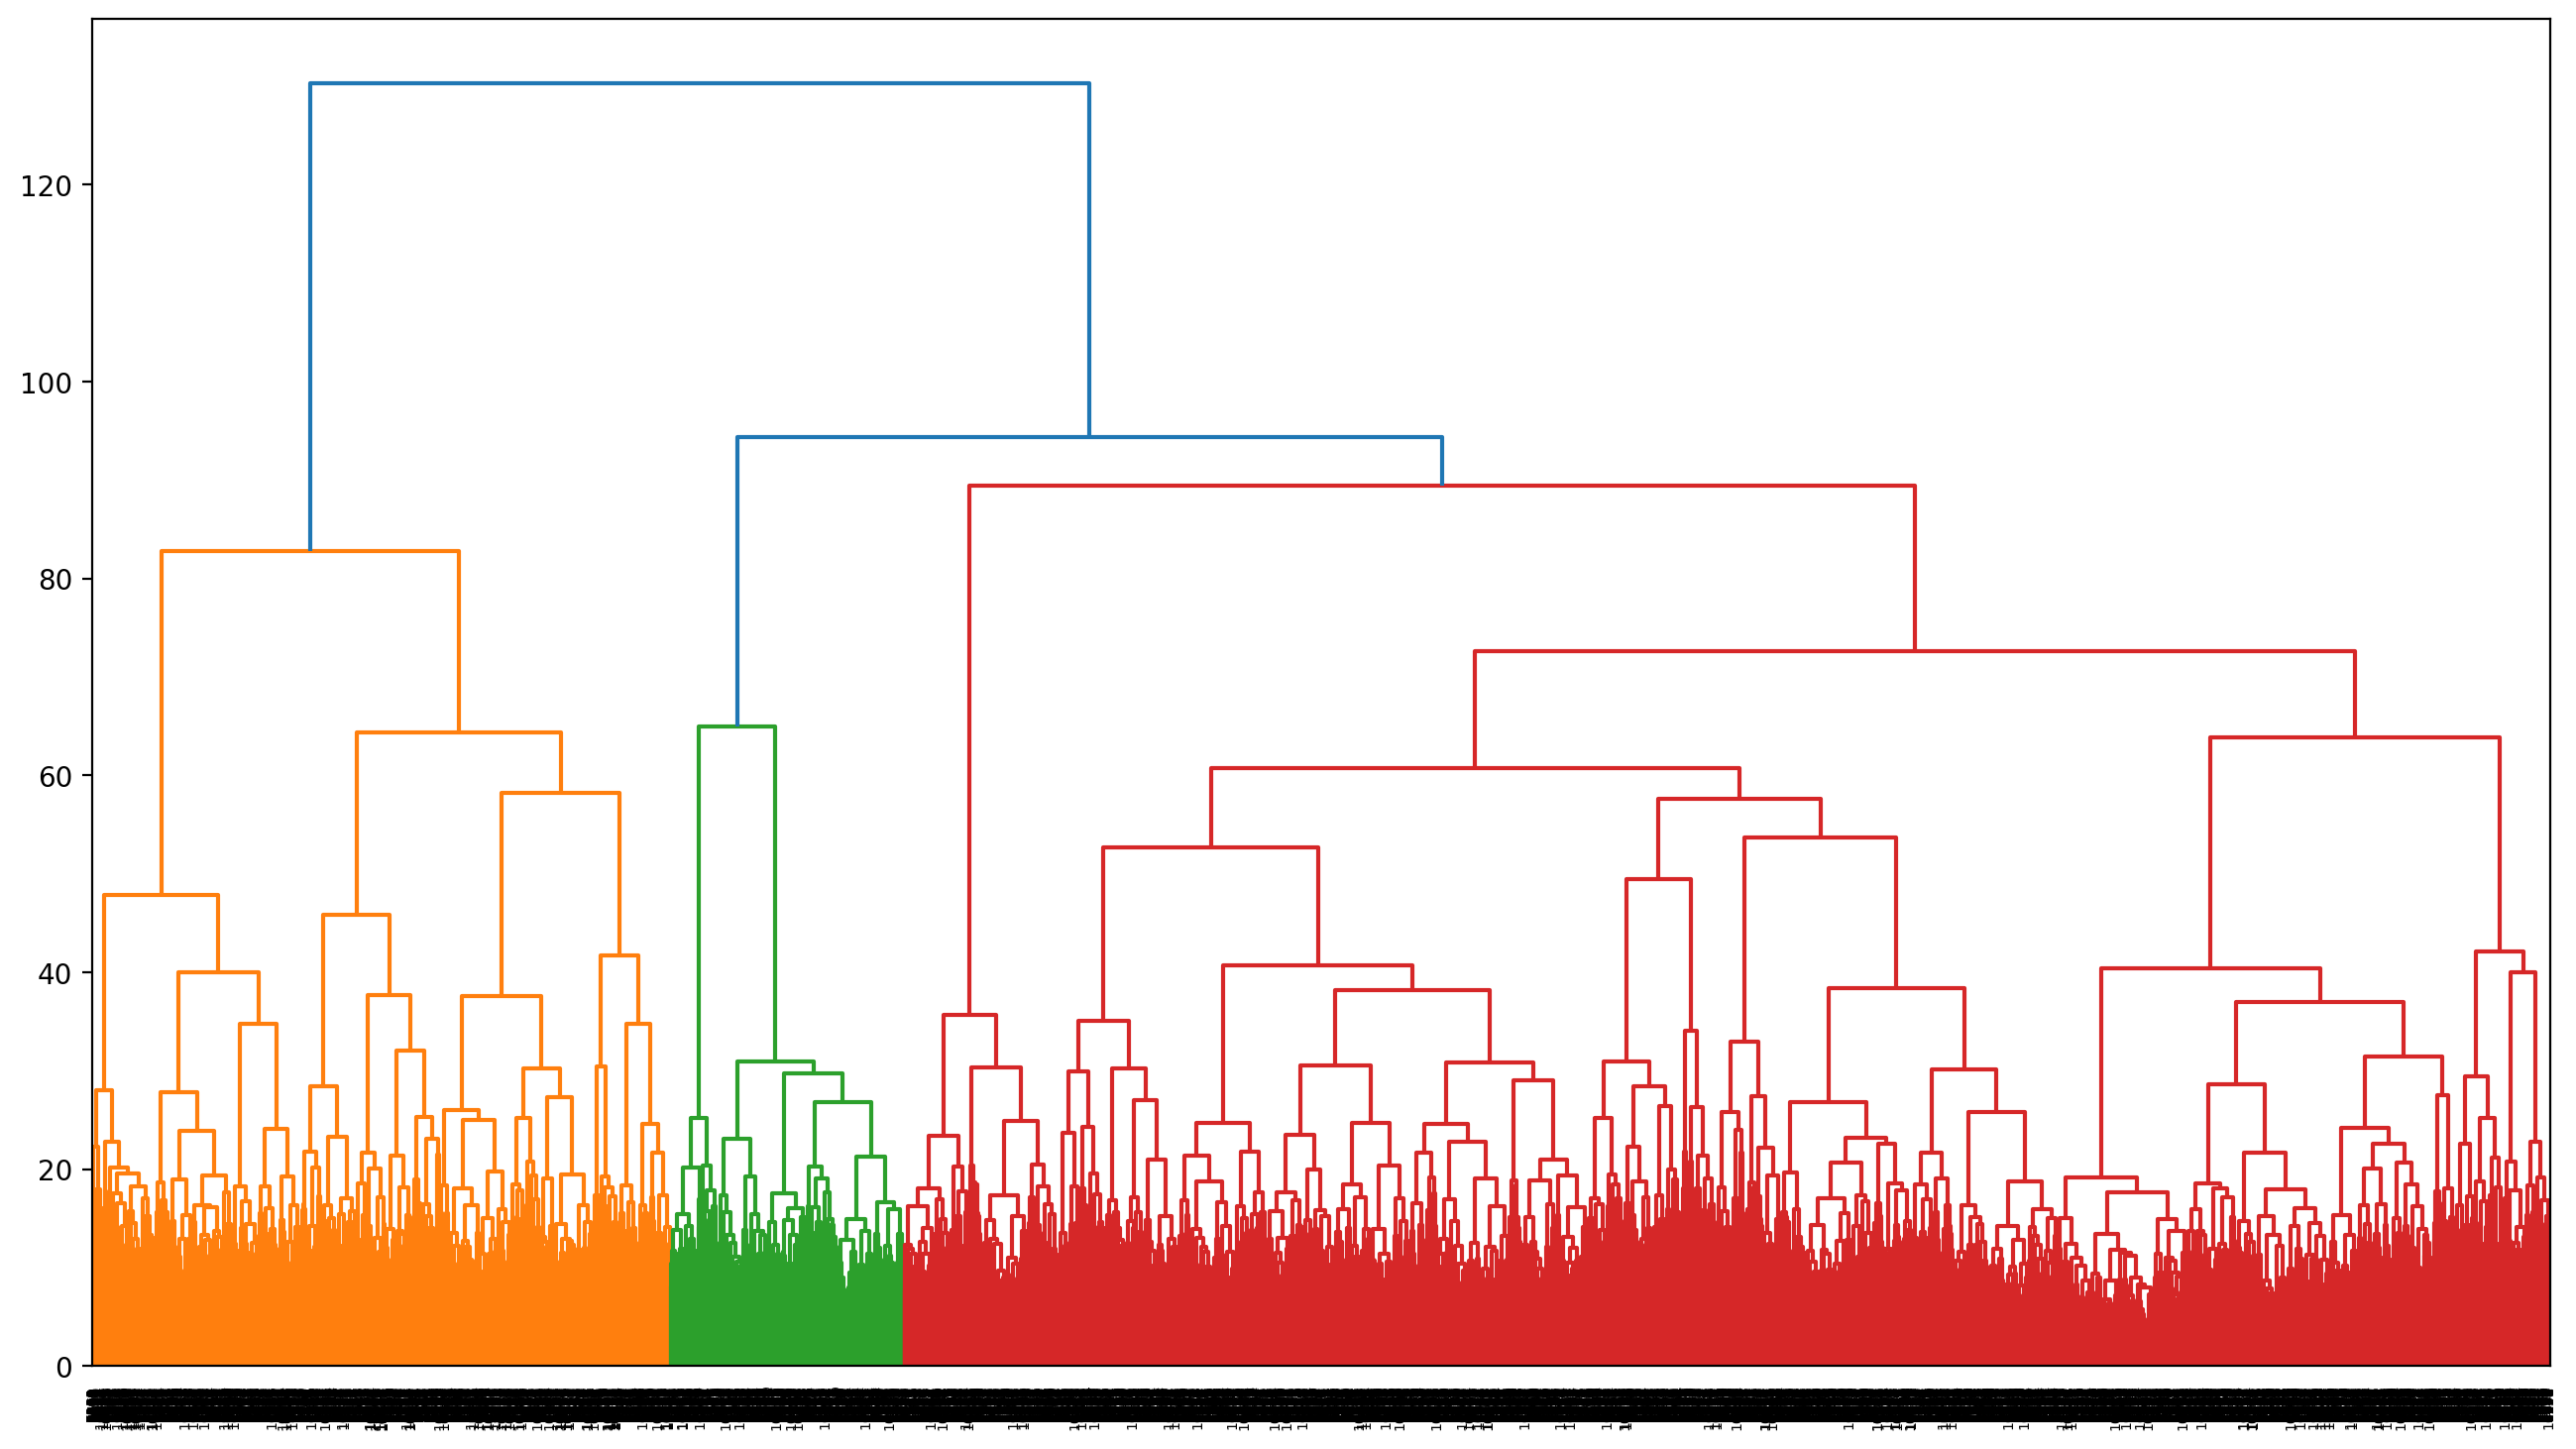

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(plot_list, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result)
plt.show()

# okapi-bm25取得

In [18]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import MeCab
import ipadic
def tokenize(text):
  tagger = MeCab.Tagger("mecab -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
  lines = tagger.parse(' '.join(text.split())).splitlines()
  words = []
  for line in lines:
    chunks = line.split('\t')
    if chunks[0] != 'EOS' and chunks[1].startswith('名詞'):
      words.append(chunks[0])
  return words

In [19]:
word_list = []
okapi_trainings = []
for train in trainings:
    okapi_trainings.append(TaggedDocument(tokenize(docdic[train.tags[0]]), [train.tags[0]]))
    for word in tokenize(docdic[train.tags[0]]):
        if word not in word_list:
            word_list.append(word)

In [20]:
okapi_trainings[0]

TaggedDocument(words=['特殊車両', '車体', '架', '装', '製作', '主体', '修理', '部品', '販売', '特殊車両', '各種', 'トラック', 'ダンプカー', '中心', '散水車', '７', '０', '％', '程度', 'そのほか', 'タンクローリー', '廃棄物', '収集', '車', 'ごみ収集車', '車両', '製作', '得意', '先', '親会社', '極東開発工業（株）', 'はじめ', '北海道', 'いすゞ自動車（株）', '北海道', '日野自動車（株）', '三菱ふそうトラック・バス（株）', 'ＵＤトラックス', '北海道', '（株）', '大手', 'ディーラー', '運送会社', '建設会社', 'ユーザー', '同社', '経由', '製作', '修理', '製作', '１', '０', '０', '％', '自社', '外注', '依存度', '部品', '販売', 'ディーラー', '指定', '工場', '対応', 'ため', '車両', '製作', '部品', '利用', '分', '販売', '製作', '併用', '売上高', '確保', 'こと', '近時', '年間', '受注', '金額', '特段', '変動', 'もよう'], tags=['010036212'])

In [21]:
len(word_list)

51583

In [22]:
tf = {}
for train in okapi_trainings:
    tf[train.tags[0]] = {}
    tmp = {}
    for word in tokenize(docdic[train.tags[0]]):
        tmp[word] = train[0].count(word)/len(train[0])
    tf[train.tags[0]] = tmp

In [241]:
import math
tmp = {}
for train in okapi_trainings:
    check = []
    for word in train[0]:
        if word not in check:
            check.append(word)
            if word not in tmp.keys():
                tmp[word] = 1
            else:
                tmp[word] += 1

In [242]:
idf = {}
for word in word_list:
  idf[word] = math.log2((len(okapi_trainings)-tmp[word]+0.5)/(tmp[word]+0.5))

In [243]:
sum = 0
for word in word_list:
  sum += tmp[word]

In [244]:
avgdl = sum/len(okapi_trainings)

In [245]:
okapi = {}
count = 0
for train in okapi_trainings:
  if train.tags[0] not in okapi.keys():
    okapi[train.tags[0]] = {}
  ex = {}
  # print(count, data.loc['プロジェクトID'], data.loc['事業名'], words)
  count += 1
  for word in train[0]:
    ex[word] = idf[word] * ((tf[train.tags[0]][word]*(2.0+1)) / (tf[train.tags[0]][word] + 2.0 * (1-0.75+0.75*(tmp[word]/avgdl))))
  
  # print(ex)
  okapi[train.tags[0]] = ex

In [246]:
result_sorted = sorted(okapi[okapi_trainings[0].tags[0]].items(), key=lambda x: x[1], reverse=True)[:50]

In [247]:
result_sorted

[('ごみ収集車', 0.6386307763487774),
 ('極東開発工業（株）', 0.5614323666580394),
 ('散水車', 0.5402205793102804),
 ('併用', 0.2902575956438386),
 ('ダンプカー', 0.2533354551141599),
 ('特段', 0.24876114226852233),
 ('いすゞ自動車（株）', 0.23188865987268423),
 ('タンクローリー', 0.1693785430454128),
 ('日野自動車（株）', 0.16500838546981003),
 ('北海道', 0.16408729143838746),
 ('三菱ふそうトラック・バス（株）', 0.1377698289804237),
 ('建設会社', 0.11206813404692278),
 ('特殊車両', 0.09914725726677245),
 ('廃棄物', 0.0872261226643238),
 ('ＵＤトラックス', 0.0872261226643238),
 ('依存度', 0.0814181272167152),
 ('運送会社', 0.04871427341418131),
 ('指定', 0.039075082665176016),
 ('架', 0.03621608613685956),
 ('分', 0.03464011296573947),
 ('収集', 0.033829117028658984),
 ('金額', 0.03267177757906165),
 ('装', 0.03205760214393704),
 ('製作', 0.02849988162422651),
 ('ディーラー', 0.02440923599712874),
 ('車体', 0.02400188949172458),
 ('確保', 0.0227271850032158),
 ('そのほか', 0.014917955739618538),
 ('年間', 0.012987415697729187),
 ('ユーザー', 0.011630687801614435),
 ('変動', 0.01054500783187384),
 ('親会社', 0.01

In [248]:
import json
obj = []
for train in trainings:
  tmp_array = []
  tmp_list = sorted(okapi[train.tags[0]].items(), key=lambda x : x[1], reverse=True)[:50]
  for tmp in tmp_list:
    try:
      tmp_array.append({"word": tmp[0],
                         "score":float(tmp[1])})
    except:
      print("skip")
  obj.append({'プロジェクトID':train.tags[0],
              'okapi':tmp_array})

with open('/Users/taikitanaka/vsc/test/okapiCCR202101.json', 'w', encoding='utf8')as f:
  json.dump(obj, f, indent=2, ensure_ascii=False)

In [250]:
[okapi[trainings[0].tags[0]]]

[{'特殊車両': 0.09914725726677245,
  '車体': 0.02400188949172458,
  '架': 0.03621608613685956,
  '装': 0.03205760214393704,
  '製作': 0.02849988162422651,
  '主体': 9.108295627477716e-05,
  '修理': 0.009430318973759115,
  '部品': 0.000911321438334818,
  '販売': -0.00022813847459441156,
  '各種': 0.00021522890751134925,
  'トラック': 0.004971471304618089,
  'ダンプカー': 0.2533354551141599,
  '中心': 8.799711597581653e-06,
  '散水車': 0.5402205793102804,
  '７': 0.001471158224286578,
  '０': -0.0013376318970655216,
  '％': -0.0008148062886556515,
  '程度': 0.000540430266903242,
  'そのほか': 0.014917955739618538,
  'タンクローリー': 0.1693785430454128,
  '廃棄物': 0.0872261226643238,
  '収集': 0.033829117028658984,
  '車': 0.0061143729843881715,
  'ごみ収集車': 0.6386307763487774,
  '車両': 0.009924865032971434,
  '得意': -0.00022150632305555456,
  '先': -0.0003558697159568841,
  '親会社': 0.01033597053914716,
  '極東開発工業（株）': 0.5614323666580394,
  'はじめ': 0.003982781663800548,
  '北海道': 0.16408729143838746,
  'いすゞ自動車（株）': 0.23188865987268423,
  '日野自動車（株）': 

In [251]:
obj = []
for i in range(len(trainings)):
  obj.append({"no":str(int(i)),
              "parent":"",
              "distance":0,
              "Title":CDdic[trainings[i].tags[0]],
              "Abstract":docdic[trainings[i].tags[0]],
              "AuthorKeywords":[],
              "Conference":"",
              "MultipartiteRank":[okapi[trainings[i].tags[0]]]
              })

for i in range(len(linkage_result)):
  obj.append({"no":str(len(linkage_result)+i+1),
              "parent":"",
              "distance":linkage_result[i][2],
              "Title":"",
              "Abstract":"",
              "AuthorKeywords":[],
              "Conference":"",
              "MultipartiteRank":[]
              })

for i in range(len(obj)):
  if i % 1000 == 0 :
    print("running", i)
  for j in range(len(linkage_result)):
    if int(obj[i]["no"]) == linkage_result[j][0] or int(obj[i]["no"]) == linkage_result[j][1]:
      obj[i]["parent"] = str(len(linkage_result)+j+1)

running 0
running 1000
running 2000
running 3000
running 4000
running 5000
running 6000
running 7000
running 8000
running 9000
running 10000
running 11000
running 12000
running 13000
running 14000
running 15000
running 16000
running 17000
running 18000
running 19000
running 20000


In [252]:
with open('/Users/taikitanaka/vsc/test/linkedDataCCR202101.json', 'w', encoding='utf8')as f:
  json.dump(obj, f, indent = 2, ensure_ascii=False)